## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
from scipy.stats.mstats import mode
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')
sns.set_context('poster')

In [2]:
DATA_FOLDER = './zippedData/'

gross_df = pd.read_csv(os.path.join(DATA_FOLDER, 'bom.movie_gross.csv.gz'),index_col=None)
name_df = pd.read_csv(os.path.join(DATA_FOLDER, 'imdb.name.basics.csv.gz'),index_col=None)
aka_df = pd.read_csv(os.path.join(DATA_FOLDER, 'imdb.title.akas.csv.gz'), index_col=None)
basic_df = pd.read_csv(os.path.join(DATA_FOLDER, 'imdb.title.basics.csv.gz'), index_col=None)
crew_df = pd.read_csv(os.path.join(DATA_FOLDER, 'imdb.title.crew.csv.gz'), index_col=None)
principal_df = pd.read_csv(os.path.join(DATA_FOLDER, 'imdb.title.principals.csv.gz'), index_col=None)
rating_df = pd.read_csv(os.path.join(DATA_FOLDER, 'imdb.title.ratings.csv.gz'), index_col=None)
info_df = pd.read_csv(os.path.join(DATA_FOLDER, 'rt.movie_info.tsv.gz'), sep='\t', index_col=None)
review_df = pd.read_csv(os.path.join(DATA_FOLDER, 'rt.reviews.tsv.gz'), sep='\t', index_col=None, encoding='latin-1')
movie_df = pd.read_csv(os.path.join(DATA_FOLDER, 'tmdb.movies.csv.gz'), index_col=None)
budget_df = pd.read_csv(os.path.join(DATA_FOLDER, 'tn.movie_budgets.csv.gz'), index_col=None)

In [3]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [5]:
print(gross_df.isna().any())
gross_df.isna().sum()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
print(gross_df.foreign_gross.isna().value_counts(normalize=True))
gross_df[gross_df.foreign_gross.isna()==True].head()

False    0.601417
True     0.398583
Name: foreign_gross, dtype: float64


,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [7]:
print(gross_df.domestic_gross.isna().value_counts(normalize=True))
gross_df[gross_df.domestic_gross.isna()==True].head()

False    0.991733
True     0.008267
Name: domestic_gross, dtype: float64


,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


In [8]:
print(gross_df.studio.isna().value_counts(normalize=True))
gross_df[gross_df.studio.isna()==True].head()

False    0.998524
True     0.001476
Name: studio, dtype: float64


,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [9]:
yearly_domegross_df = gross_df.groupby('year')
yearly_domegross_df.first()

,title,studio,domestic_gross,foreign_gross
year,,,,
2010,Toy Story 3,BV,415000000.0,652000000
2011,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000
2012,Marvel's The Avengers,BV,623400000.0,895500000
2013,Frozen,BV,400700000.0,875700000
2014,Transformers: Age of Extinction,Par.,245400000.0,858600000
2015,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6"
2016,Captain America: Civil War,BV,408100000.0,745200000
2017,Star Wars: The Last Jedi,BV,620200000.0,712400000
2018,Avengers: Infinity War,BV,678800000.0,"1,369.5"


In [10]:
yearly_domegross_df.groups.keys()

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [11]:
count1 = 0
count2 = 0
for year in yearly_domegross_df.groups.keys():
    count1 += 1
    print(year,':')
    #print(yearly_domegross_df.groups[year])
    for i in yearly_domegross_df.groups[year]:
        count2 += 1
        print(gross_df.loc[i,'domestic_gross'])
        if count2 > 5:
            count2 = 0
            break
    print('\n')
    if count1 > 5:
        break

2010 :
415000000.0
334200000.0
296000000.0
292600000.0
238700000.0
300500000.0


2011 :
381000000.0
352400000.0
241100000.0
281300000.0
209400000.0
165200000.0


2012 :
623400000.0
304400000.0
448100000.0
303000000.0
161300000.0
292300000.0


2013 :
400700000.0
409000000.0
368100000.0
258399999.0
424700000.0
238700000.0


2014 :
245400000.0
255100000.0
333200000.0
241400000.0
337100000.0
233900000.0


2015 :
936700000.0
652300000.0
353000000.0
459000000.0
336000000.0
200100000.0




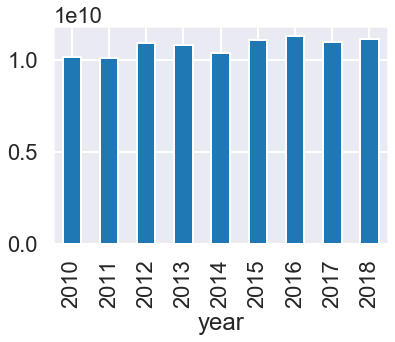

In [12]:
gross_df.groupby('year').domestic_gross.sum().plot(kind='bar')

In [13]:
print('before',gross_df.foreign_gross.dtype)
gross_df.foreign_gross = pd.to_numeric(gross_df.foreign_gross, errors='coerce')
print('after',gross_df.foreign_gross.dtype)

before object
after float64


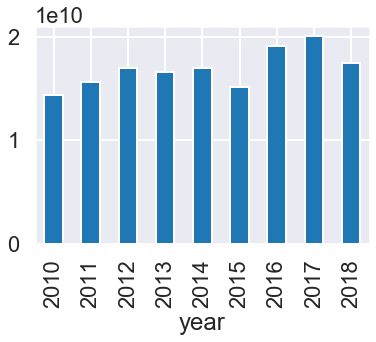

In [14]:
gross_df.groupby('year').foreign_gross.sum().plot(kind='bar')

In [15]:
gross_df.foreign_gross.isna().value_counts(normalize=True)

False    0.599941
True     0.400059
Name: foreign_gross, dtype: float64

In [16]:
gross_df[gross_df.foreign_gross.isna() == True].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [17]:
gross_df[gross_df.foreign_gross.isna() == False].head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [18]:
name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [19]:
name_df.dtypes

nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

In [20]:
print(name_df.isna().any())
name_df.isna().sum()

nconst                False
primary_name          False
birth_year             True
death_year             True
primary_profession     True
known_for_titles       True
dtype: bool


nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [21]:
print(name_df.birth_year.isna().value_counts(normalize=True))
name_df[name_df.birth_year.isna()==True].head()

True     0.863618
False    0.136382
Name: birth_year, dtype: float64


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [22]:
print(name_df.death_year.isna().value_counts(normalize=True))
name_df[name_df.death_year.isna()==True].head()

True     0.988819
False    0.011181
Name: death_year, dtype: float64


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [23]:
print(name_df.primary_profession.isna().value_counts(normalize=True))
name_df[name_df.primary_profession .isna()==True].head()

False    0.915371
True     0.084629
Name: primary_profession, dtype: float64


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
172,nm0120366,Ralph Bunche,1904.0,1971.0,NaN,"tt0044284,tt0040053,tt1801623,tt0236552"
371,nm0256636,Emperor Franz Josef,1830.0,1916.0,NaN,"tt0454492,tt4615796,tt0399852,tt0378168"
422,nm0278661,Renee Firestone,NaN,NaN,NaN,"tt0956313,tt2102508,tt0463998,tt0174852"
655,nm0441808,Mike Katz,1944.0,NaN,NaN,"tt0076578,tt1640227,tt0120195,tt2205904"
929,nm0688002,Norman Podhoretz,1930.0,NaN,NaN,"tt1195499,tt0058896,tt2319949,tt0277185"


In [24]:
print(name_df.known_for_titles.isna().value_counts(normalize=True))
name_df[name_df.known_for_titles.isna()==True].head()

False    0.950212
True     0.049788
Name: known_for_titles, dtype: float64


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
1282,nm10108345,Jiaxi Li,NaN,NaN,actor,NaN
1289,nm10113099,Greg Quibell,NaN,NaN,actor,NaN
1292,nm10114259,Vera Prifatamasari,NaN,NaN,actress,NaN
1296,nm10115487,Laurette De Haan,NaN,NaN,"director,writer,cinematographer",NaN
1297,nm10115788,Sustraida's Band,NaN,NaN,composer,NaN


In [25]:
aka_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [26]:
aka_df.dtypes

title_id              object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

In [27]:
print(aka_df.isna().any())
aka_df.isna().sum()

title_id             False
ordering             False
title                False
region                True
language              True
types                 True
attributes            True
is_original_title     True
dtype: bool


title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [28]:
print(aka_df.language.isna().value_counts(normalize=True))
aka_df[aka_df.language.isna()==True].head()

True     0.87424
False    0.12576
Name: language, dtype: float64


,title_id,ordering,title,region,language,types,attributes,is_original_title
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0


In [29]:
print(aka_df.types.isna().value_counts(normalize=True))
aka_df[aka_df.types.isna()==True].head()

False    0.507825
True     0.492175
Name: types, dtype: float64


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
13,tt0369610,22,Jurassic World 3D,DE,NaN,NaN,3-D version,0.0
14,tt0369610,23,Jurassic World 3D,XWW,NaN,NaN,3-D version,0.0


In [30]:
print(aka_df.region.isna().value_counts(normalize=True))
aka_df[aka_df.region.isna()==True].head()

False    0.839335
True     0.160665
Name: region, dtype: float64


,title_id,ordering,title,region,language,types,attributes,is_original_title
38,tt0369610,45,Jurassic World,NaN,NaN,original,NaN,1.0
80,tt0401729,7,John Carter,NaN,NaN,original,NaN,1.0
83,tt10010134,1,Versailles Rediscovered - The Sun King's Vanis...,NaN,NaN,original,NaN,1.0
86,tt10027708,1,Miguelito - Canto a Borinquen,NaN,NaN,original,NaN,1.0
90,tt10050722,1,Thing I Don't Get,NaN,NaN,original,NaN,1.0


In [31]:
print(aka_df.attributes.isna().value_counts(normalize=True))
aka_df[aka_df.attributes.isna()==True].head()

True     0.955005
False    0.044995
Name: attributes, dtype: float64


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0


In [32]:
print(aka_df.attributes.nunique())
aka_df.attributes.unique()

77


array([nan, 'short title', '3-D version', 'fake working title',
       'informal alternative title', 'dubbed version',
       'transliterated ISO-LATIN-1 title', 'original script title',
       'IMAX version', 'alternative spelling', 'DVD box title',
       'new title', 'literal title', 'literal English title',
       'alternative transliteration', 'promotional title', 'poster title',
       'cable TV title', 'informal title', 'long title',
       'informal literal English title', 'promotional abbreviation',
       'complete title', 'informal short title', 'rerun title',
       'original subtitled version', 'longer version',
       'informal literal title', 'theatrical title', 'trailer title',
       'informal English title', 'closing credits title',
       'Cannes festival title', 'Berlin film festival title',
       'bootleg title', 'reissue title', 'series title', 'review title',
       'literal translation of working title', 'premiere title',
       'segment title', 'long new title

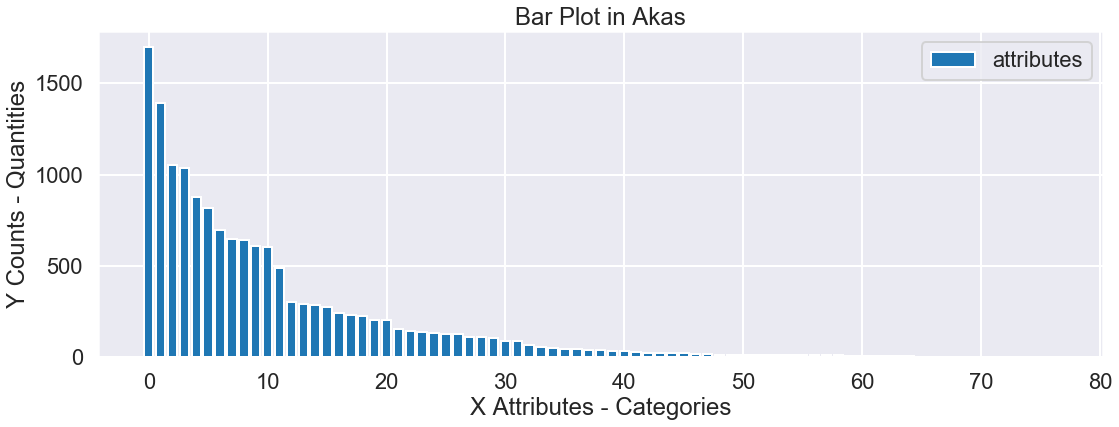

In [33]:
plt.figure(figsize=(18,6))
plt.bar(np.arange(aka_df.attributes.nunique()), aka_df.attributes.value_counts(), label='attributes')
plt.xlabel('X Attributes - Categories')
plt.ylabel('Y Counts - Quantities')

plt.title('Bar Plot in Akas')
plt.legend()
plt.show()

In [34]:
basic_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [35]:
basic_df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [36]:
print(basic_df.isna().any())
basic_df.isna().sum()

tconst             False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [37]:
basic_df.runtime_minutes.isna().value_counts(normalize=True)

False    0.782824
True     0.217176
Name: runtime_minutes, dtype: float64

In [38]:
basic_df.genres.isna().value_counts(normalize=True)

False    0.962995
True     0.037005
Name: genres, dtype: float64

In [39]:
basic_df.original_title.isna().value_counts(normalize=True)

False    0.999856
True     0.000144
Name: original_title, dtype: float64

In [40]:
crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [41]:
crew_df.dtypes

tconst       object
directors    object
writers      object
dtype: object

In [42]:
print(crew_df.isna().any())
crew_df.isna().sum()

tconst       False
directors     True
writers       True
dtype: bool


tconst           0
directors     5727
writers      35883
dtype: int64

In [43]:
crew_df.writers.isna().value_counts(normalize=True)

False    0.754468
True     0.245532
Name: writers, dtype: float64

In [44]:
crew_df.directors.isna().value_counts(normalize=True)

False    0.960813
True     0.039187
Name: directors, dtype: float64

In [45]:
principal_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [46]:
print(principal_df.isna().any())
principal_df.isna().sum()

tconst        False
ordering      False
nconst        False
category      False
job            True
characters     True
dtype: bool


tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [47]:
principal_df.job.isna().value_counts(normalize=True)

True     0.827187
False    0.172813
Name: job, dtype: float64

In [48]:
principal_df.characters.isna().value_counts(normalize=True)

True     0.617423
False    0.382577
Name: characters, dtype: float64

In [49]:
rating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [50]:
print(rating_df.isna().any())
rating_df.isna().sum()

tconst           False
averagerating    False
numvotes         False
dtype: bool


tconst           0
averagerating    0
numvotes         0
dtype: int64

In [51]:
info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [52]:
info_df.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [53]:
print(info_df.isna().any())
info_df.isna().sum()

id              False
synopsis         True
rating           True
genre            True
director         True
writer           True
theater_date     True
dvd_date         True
currency         True
box_office       True
runtime          True
studio           True
dtype: bool


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [54]:
info_df.director.isna().value_counts(normalize=True)

False    0.872436
True     0.127564
Name: director, dtype: float64

In [55]:
info_df.writer.isna().value_counts(normalize=True)

False    0.712179
True     0.287821
Name: writer, dtype: float64

In [56]:
info_df.theater_date.isna().value_counts(normalize=True)

False    0.769872
True     0.230128
Name: theater_date, dtype: float64

In [57]:
info_df.dvd_date.isna().value_counts(normalize=True)

False    0.769872
True     0.230128
Name: dvd_date, dtype: float64

In [58]:
info_df.currency.isna().value_counts(normalize=True)

True     0.782051
False    0.217949
Name: currency, dtype: float64

In [59]:
info_df.box_office.isna().value_counts(normalize=True)

True     0.782051
False    0.217949
Name: box_office, dtype: float64

In [60]:
info_df.runtime.isna().value_counts(normalize=True)

False    0.980769
True     0.019231
Name: runtime, dtype: float64

In [61]:
info_df.studio.isna().value_counts(normalize=True)

True     0.683333
False    0.316667
Name: studio, dtype: float64

In [62]:
info_df.synopsis.isna().value_counts(normalize=True)

False    0.960256
True     0.039744
Name: synopsis, dtype: float64

In [63]:
info_df.rating.isna().value_counts(normalize=True)

False    0.998077
True     0.001923
Name: rating, dtype: float64

In [64]:
info_df.genre.isna().value_counts(normalize=True)

False    0.994872
True     0.005128
Name: genre, dtype: float64

In [65]:
review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [66]:
review_df.dtypes

id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

In [67]:
print(review_df.isna().any())
review_df.isna().sum()

id            False
review         True
rating         True
fresh         False
critic         True
top_critic    False
publisher      True
date          False
dtype: bool


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [68]:
review_df.review.isna().value_counts(normalize=True)

False    0.897799
True     0.102201
Name: review, dtype: float64

In [69]:
review_df.rating.isna().value_counts(normalize=True)

False    0.751672
True     0.248328
Name: rating, dtype: float64

In [70]:
review_df.critic.isna().value_counts(normalize=True)

False    0.949993
True     0.050007
Name: critic, dtype: float64

In [71]:
review_df.publisher.isna().value_counts(normalize=True)

False    0.994323
True     0.005677
Name: publisher, dtype: float64

In [77]:
review_df.top_critic.unique()

array([0, 1], dtype=int64)

<BarContainer object of 2 artists>

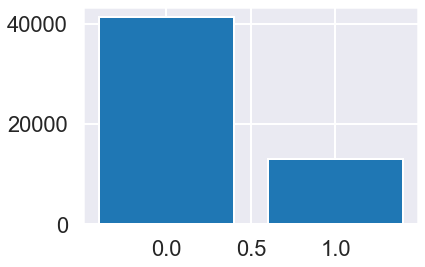

In [79]:
plt.bar(np.arange(review_df.top_critic.nunique()),review_df.top_critic.value_counts())

In [72]:
movie_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [73]:
movie_df.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [74]:
print(movie_df.isna().any())
movie_df.isna().sum()

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [75]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [76]:
print(budget_df.isna().any())
budget_df.isna().sum()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64